<div >
<img src = "figs/ans_banner_1920x200.png" />
</div>

# Caso-taller:  Analizando el Delito en Chicago

En este caso-taller vamos a utilizar datos geográficos y estimación de densidad de kernel para analizar delitos en Chicago. Esta ciudad es muy famosa no sólo por haber sido el hogar del mafioso Al Capone, sino también por sus altas tasas de delitos. 

Para este taller obtuve datos del portal de la [ciudad de Chicago](https://www.chicago.gov/city/en/dataset/crime.html). La base de datos fue traducida y modificada para nuestras necesidades. Esta contiene todos los homicidios y robos que sucedieron entre el 1 de junio y el 31 de agosto de 2019.


## Instrucciones generales

1. Para desarrollar el *cuaderno* primero debe descargarlo.

2. Para responder cada inciso deberá utilizar el espacio debidamente especificado.

3. La actividad será calificada sólo si sube el *cuaderno* de jupyter notebook con extensión `.ipynb` en la actividad designada como "entrega calificada por el personal".

4. El archivo entregado debe poder ser ejecutado localmente por el tutor. Sea cuidadoso con la especificación de la ubicación de los archivos de soporte, guarde la carpeta de datos en el mismo `path` de su cuaderno, por ejemplo: `data`.

## Desarrollo


### 1.Carga de datos 

En los `Archivos de Laboratorio`, en la carpeta `data` se encuentra el archivo `Chicago_delitos_verano_2019.csv` cargue estos datos en su *cuaderno*. También se encuentran los arhivos con los polígonos de las áreas comunitarias en un archivo comprimido llamado `Areas_comunitarias_Chicago.zip`.

In [ ]:
#Instalar todas las librerias ncesarias
!pip install pyrosm
!pip install geopandas
!pip install geojsoncontour

import pandas as pd 
import seaborn as sns
from datetime import datetime
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


delitos_df = pd.read_csv('data/Chicago_delitos_verano_2019.csv')
delitos_df.head()

import geopandas as gpd
from shapely.geometry import Point
areas_comunitarias_gpd = gpd.read_file('data/Areas_comunitarias_Chicago.zip')
areas_comunitarias_gpd.to_crs( "EPSG:4326")
areas_comunitarias_gpd.crs

print(delitos_df.shape)
print(areas_comunitarias_gpd.shape)

delitos_df.head()
areas_comunitarias_gpd.head()


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 2.1 MB 14.0 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 1.6 MB 57.4 MB/s 
  Using cached pyrobuf-0.9.3-cp37-cp37m-linux_x86_64.whl
     |████████████████████████████████| 1.0 MB 66.9 MB/s 
  Using cached cykhash-2.0.0-cp37-cp37m-linux_x86_64.whl
     |████████████████████████████████| 2.1 MB 62.1 MB/s 
     |████████████████████████████████| 6.3 MB 41.4 MB/s 
     |████████████████████████████████| 16.7 MB 48.0 MB/s 
  Created wheel for pyrosm: filename=pyrosm-0.6.1-cp37-cp37m-linux_x86_64.whl size=5431129 sha256=c0e68ce0eb17b39977d14284ef8d995c5afb459c0e6c418a9b3e64695771f538
  Stored in directory: /root/.cache/pip/wheels/e8/9e/d8/e424ffc5eaa71ccb122bb79d92ef75802c49b9b0a9366d6da4
Successfully built pyrosm
Looking in index

,area,area_num_1,area_numbe,comarea,comarea_id,community,perimeter,shape_area,shape_len,geometry
0,0.0,35,35,0.0,0.0,DOUGLAS,0.0,4.600462e+07,31027.054510,"POLYGON ((-87.60914 41.84469, -87.60915 41.844..."
1,0.0,36,36,0.0,0.0,OAKLAND,0.0,1.691396e+07,19565.506153,"POLYGON ((-87.59215 41.81693, -87.59231 41.816..."
2,0.0,37,37,0.0,0.0,FULLER PARK,0.0,1.991670e+07,25339.089750,"POLYGON ((-87.62880 41.80189, -87.62879 41.801..."
3,0.0,38,38,0.0,0.0,GRAND BOULEVARD,0.0,4.849250e+07,28196.837157,"POLYGON ((-87.60671 41.81681, -87.60670 41.816..."
4,0.0,39,39,0.0,0.0,KENWOOD,0.0,2.907174e+07,23325.167906,"POLYGON ((-87.59215 41.81693, -87.59215 41.816..."


# Análisis

- Se leen en pandas el archivo 'Chicago_delitos_verano_2019.csv'. 

- Se usa geopandas para cargar 'Areas_comunitarias_Chicago.zip' que contiene todos los archivos soporte del formato Shapefile. Geopandas nos permite trabajar con datos y geometrias geoespaciales.

- Las dimensiones del dataframe de delitos es (17747, 5). 
- Las dimensiones del geodatframe de geometrias es (77, 10) y son poligonos porque representan areas espaciales que representan las areas comunitarias de Chicago. 

- Se transforma la geometria activa del anterior geodataframe a un sistema de referencia de coordenadas  EPSG:4326. Este  añade Greenwich como punto de partida (meridiano principal) para la longitud (0°) y establece las unidades en grados (°)

### 2.   Análisis descriptivo de los datos. 

Realice un análisis de los datos utilizando estadísticas descriptivas en tablas y/o gráficas.

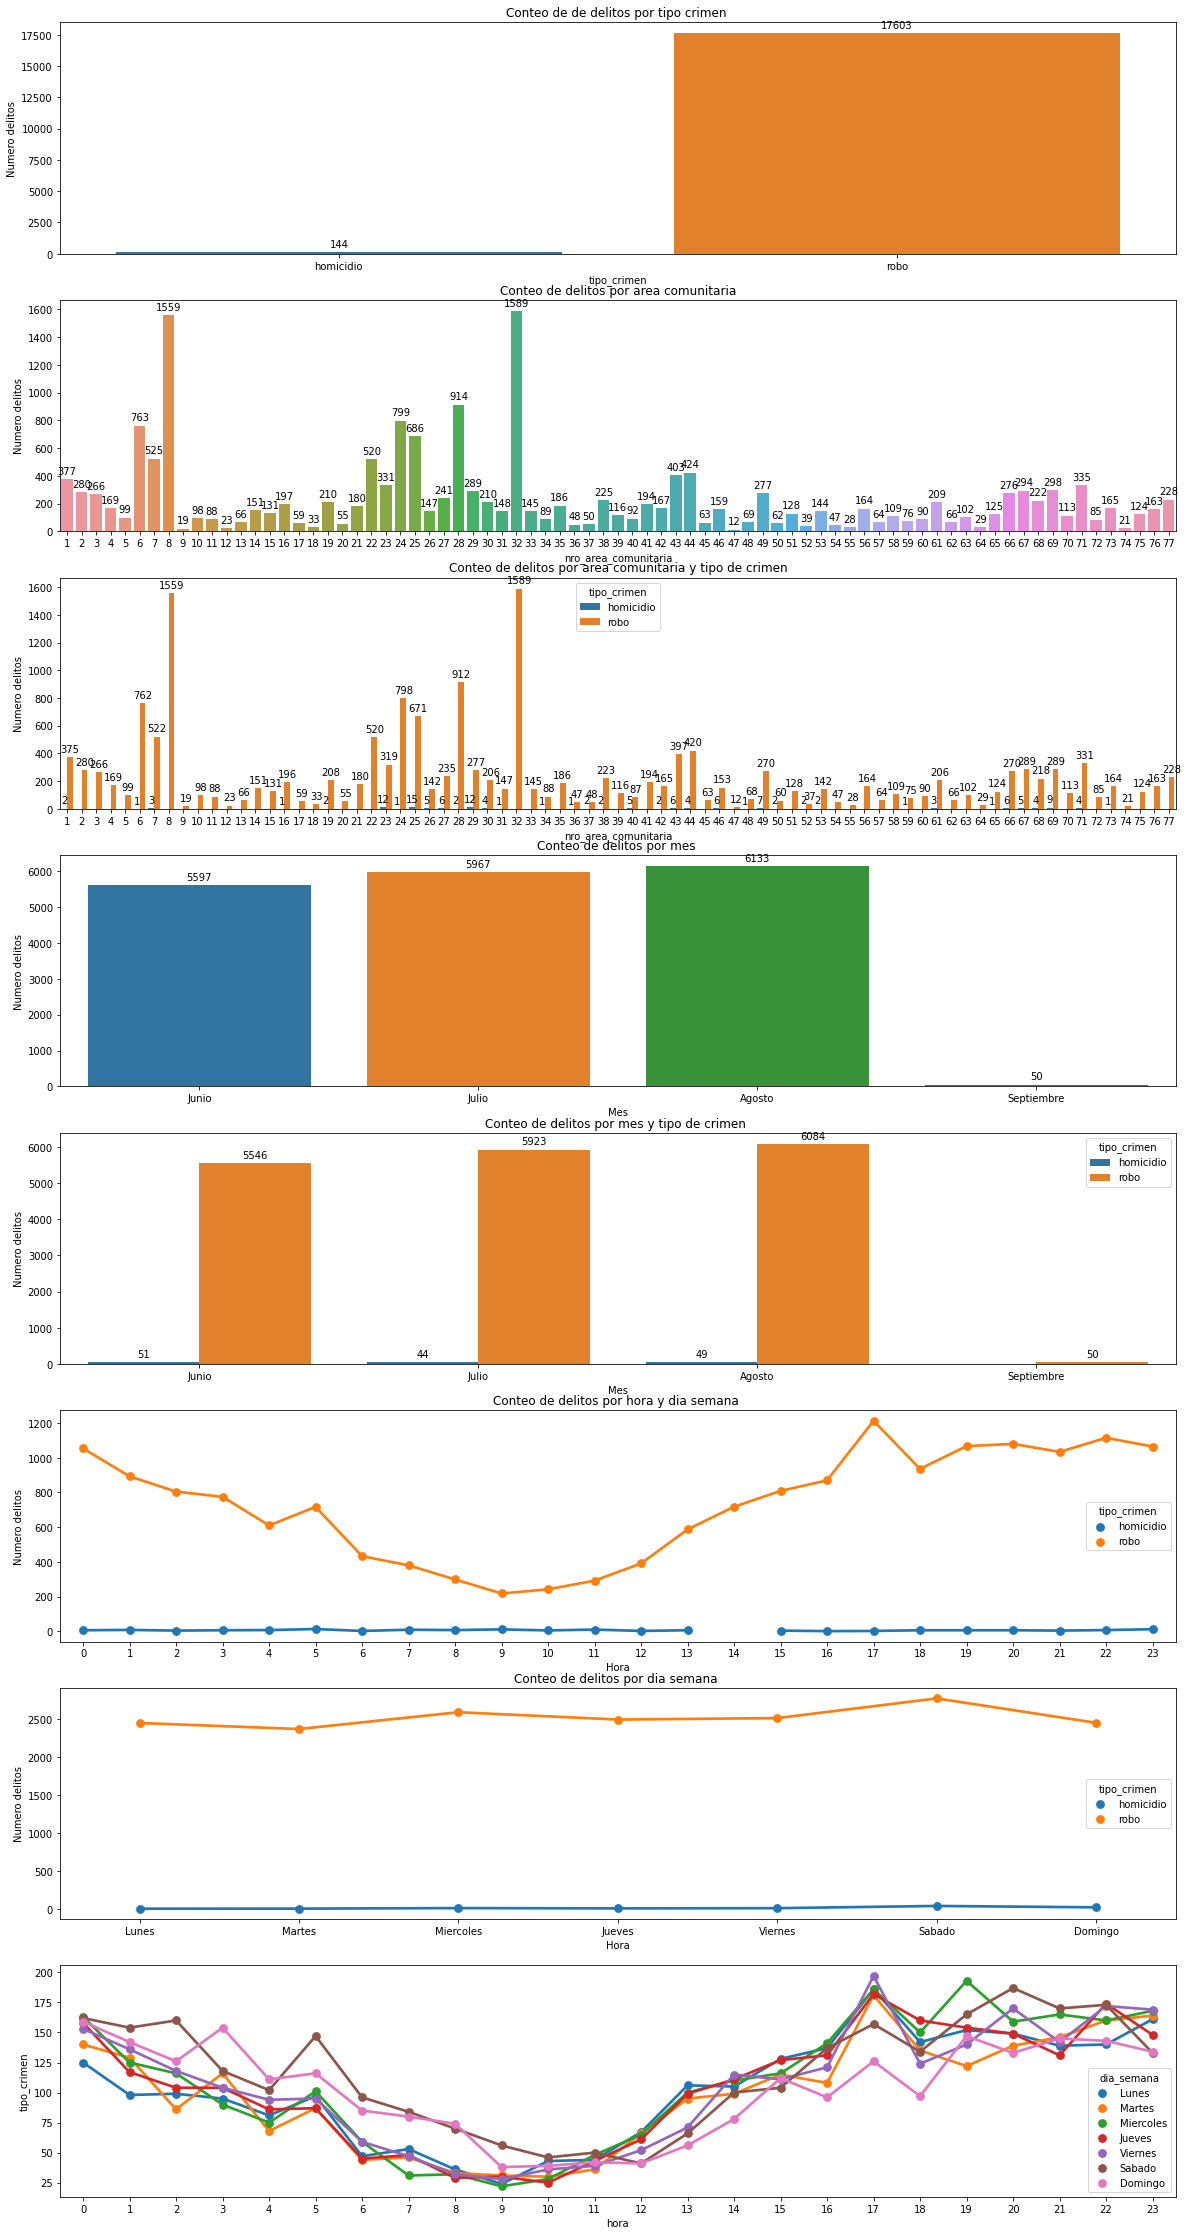

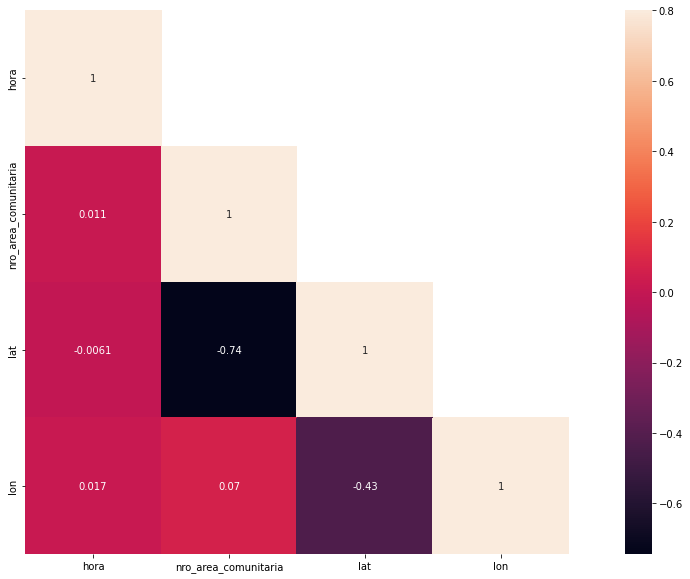

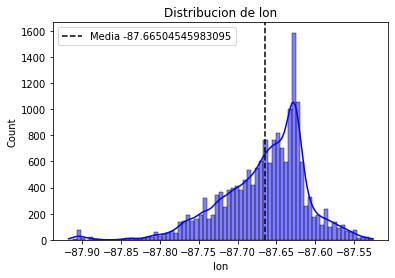

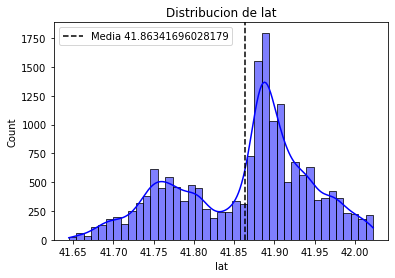

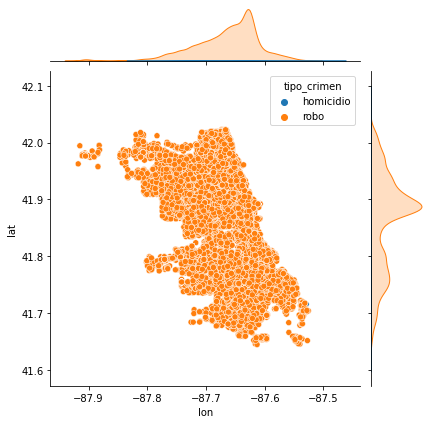

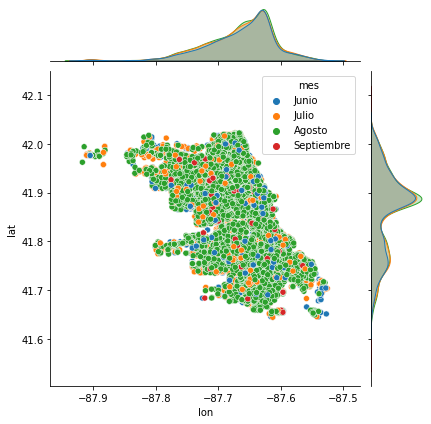

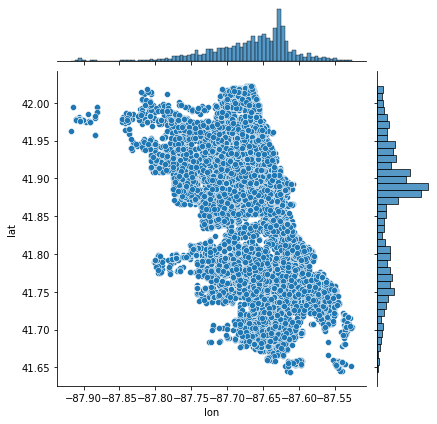

In [ ]:
import dateutil
import numpy as np

def adicionar_texto_plot(plots):
    for bar in plots.patches:
        plots.annotate( format(bar.get_height(), '.0f') ,
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=10, xytext=(0, 8),  textcoords='offset points')
# Histogramas  de coordenadas

def histogramas_coordenadas(df, columna):
  sns.histplot(df[columna],  kde=True, color='b')
  plt.axvline(df[columna].mean(), color='k', linestyle='--', label=f'Media {df[columna].mean()}')
  plt.title(f'Distribucion de {columna}'); 
  plt.legend()
  plt.show()



#Separa Fecha en Mes, Hora y Dia de la Semana con el objetivo de caracterizar los delitos por mes, hora y dia de semana
def descomponer_fecha(fecha, elemento, meses, dias):
  item= fecha
  if elemento == 'mes':
    item = mes[dateutil.parser.isoparse(fecha).month-1]
  elif elemento=='hora':
    item = dateutil.parser.isoparse(fecha).hour 
  elif elemento=='diasemana':
    item=dias[dateutil.parser.isoparse(fecha).weekday()]
  return item
    
# Ingeniera de Features   
mes = ['Enero','Febrero', 'Marzo', 'Abril', 'Mayo','Junio','Julio','Agosto','Septiembre','Octubre','Noviembre', 'Diciembre']
dias = ["Lunes", "Martes", "Miercoles","Jueves", "Viernes", "Sabado", "Domingo"]

#Separar de la fecha, el mes para poder determinar los meses con mas delitos
delitos_df["mes"]= delitos_df["fecha"].apply(lambda fecha: descomponer_fecha(fecha,'mes',mes,dias))

#Separar de la fecha, la hora para poder determinar las horas del dia  con mas delitos
delitos_df["hora"]= delitos_df["fecha"].apply(lambda fecha: descomponer_fecha(fecha,'hora',mes, dias) )

#Separar de la fecha, el dia de la semana para poder determinar los dias con mas   con mas delitos
delitos_df["dia_semana"]= delitos_df["fecha"].apply(lambda fecha: descomponer_fecha(fecha,'diasemana',mes, dias) )


#Visualizacviones
fig,(ax1,ax2,ax3,ax4,ax5,ax6, ax7,ax8)= plt.subplots(nrows=8)
fig.set_size_inches(20,40)

#Conteo de de delitos por tipo crimen
plots=sns.countplot(x ='tipo_crimen',  data = delitos_df, ax=ax1)
adicionar_texto_plot(plots)
ax1.set(xlabel='tipo_crimen', ylabel='Numero delitos',title="Conteo de de delitos por tipo crimen ")

#Conteo de de delitos por area comunitaria
plots=sns.countplot(x ='nro_area_comunitaria',  data = delitos_df, ax=ax2)
adicionar_texto_plot(plots)
ax2.set(xlabel='nro_area_comunitaria', ylabel='Numero delitos',title="Conteo de delitos por area comunitaria")

#Conteo de de delitos por area comunitaria y tio de crimen
plots=sns.countplot(x ='nro_area_comunitaria',  hue='tipo_crimen', data=delitos_df, ax=ax3)
adicionar_texto_plot(plots)
ax3.set(xlabel='nro_area_comunitaria', ylabel='Numero delitos',title="Conteo de delitos por area comunitaria y tipo de crimen")


#Conteo de de delitos por mes
plots=sns.countplot(x ='mes',  data = delitos_df, ax=ax4)
adicionar_texto_plot(plots)
ax4.set(xlabel='Mes', ylabel='Numero delitos',title="Conteo de delitos por mes ")


#Conteo de delitos por mes y tipo de crimen
plots=sns.countplot(x ='mes',  data = delitos_df, hue='tipo_crimen',ax=ax5)
adicionar_texto_plot(plots)
ax5.set(xlabel='Mes', ylabel='Numero delitos',title="Conteo de delitos por mes y tipo de crimen ")


#Conteo de delitos por hora
hora_agregada = pd.DataFrame(delitos_df.groupby(["hora","tipo_crimen"],sort=True).agg({'lat':'count'})).reset_index()
sns.pointplot(x=hora_agregada["hora"], y=hora_agregada["lat"],hue=hora_agregada["tipo_crimen"], data=hora_agregada, join=True,ax=ax6)
ax7.set(xlabel='Hora', ylabel='Numero delitos',title="Conteo de delitos por hora ")

#Conteo de delitos por diasemana
hora_agregada = pd.DataFrame(delitos_df.groupby(["dia_semana","tipo_crimen"],sort=True).agg({'lat':'count'})).reset_index()
sns.pointplot(x=hora_agregada["dia_semana"], y=hora_agregada["lat"],hue=hora_agregada["tipo_crimen"], 
              data=hora_agregada, order=dias,join=True,ax=ax7)
ax7.set(xlabel='Hora', ylabel='Numero delitos',title="Conteo de delitos por dia semana ")


#Conteo de delitos por hora y dia de la semana
hora_agregada = pd.DataFrame(delitos_df.groupby(["hora","dia_semana"],sort=True).agg({'tipo_crimen':'count'})).reset_index()
sns.pointplot(x=hora_agregada["hora"], y=hora_agregada["tipo_crimen"],hue=hora_agregada["dia_semana"],hue_order=dias, data=hora_agregada,
              join=True,ax=ax8)
ax6.set(xlabel='Hora', ylabel='Numero delitos',title="Conteo de delitos por hora y dia semana ")


corr = delitos_df[["mes","hora","nro_area_comunitaria","lat","lon"]].corr()
mask = np.array(corr)
mask[np.tril_indices_from(mask)] = False
fig,ax= plt.subplots()
fig.set_size_inches(20,10)
sns.heatmap(corr, mask=mask,vmax=.8, square=True,annot=True)
plt.show()

histogramas_coordenadas(delitos_df, 'lon')
histogramas_coordenadas(delitos_df, 'lat')


sns.jointplot(data = delitos_df, x = "lon", y = "lat", hue='tipo_crimen')
sns.jointplot(data = delitos_df, x = "lon", y = "lat", hue='mes'  )
sns.jointplot(data = delitos_df, x = "lon", y = "lat")
plt.show()


# Análisis

- Se descompone la fecha en Mes, Hora y Dia de la Semana con el objetivo de caracterizar los delitos por mes, hora y dia de semana.

- En el conteo de crimenes , el tipo de crimen mayoritario es 'robo' con 99% de incidentes y 1% de homicidios.

- El area comunitaria 32 registra el maximo numero de crimenes con 1589 incidentes representando casi el 9%. El area comunitaria 46 registra el menor numero de crimenes con  solamente 12 incidentes representandfo solamente 0.6%.

- Respecto al mes, el maximo rnumero de crimenes se registra en Agosto con 34%. En septiembre se registra solamente 50 casos . Septiembre se convierte en el final del verano.

- Respecto a la hora del dia , se observa un pico a las 5 de la tarde con un maximo de 1200 casos. Otra hora caliente es la 5 am con casi 800 casos. Las 9 am es una hora valle con el mas bajo caso de incidentes. A las 2 pm  hubo cero homicidios.

- Respecto al dia de la semana, los dias Miercoles, Viernes y Sabado son los dias de la semana con mayor casos de criminalidad.

- Respecto a horas y dias de semana,  los domingos y sabados en la madrugada tienen un mayour indice de criminalidad. El viernes a las 5 pm y los sabados  a las  8 pm de la noche es el dia y hora con  mayor casos de crimen

- En el histograma de latitud, se observa una media de 41.8634º.
- En el histograma de longitud, se observa una meda  de -87.6650º.

Usando los polígonos de las áreas comunitarias genere 3 mapas que muestren para cada área:

1. El total de delitos. 
2. El total de robos.
3. El total de homicidios.

Nota: utilice una paleta de colores y escala numérica que permitan una buena interpretación de los mapas.

Text(0.5, 1.0, 'Areas comunitarias por Total Robos')

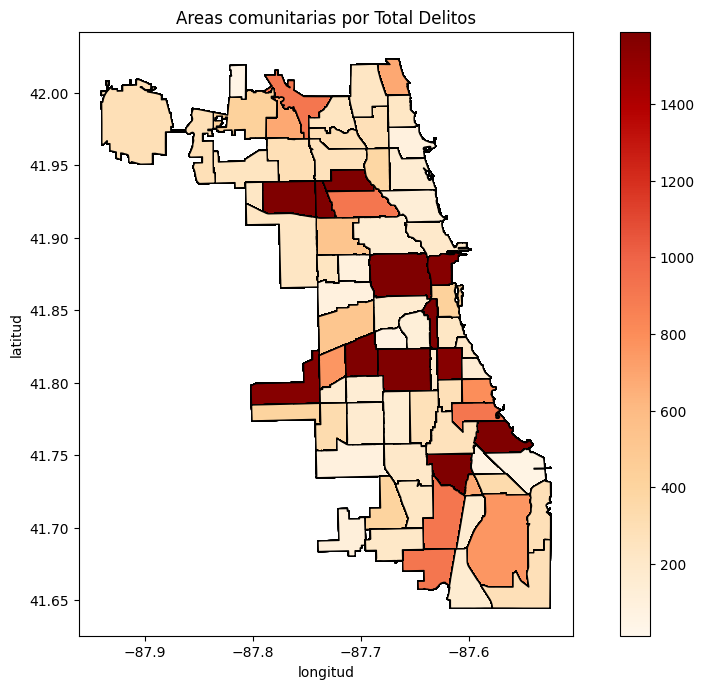

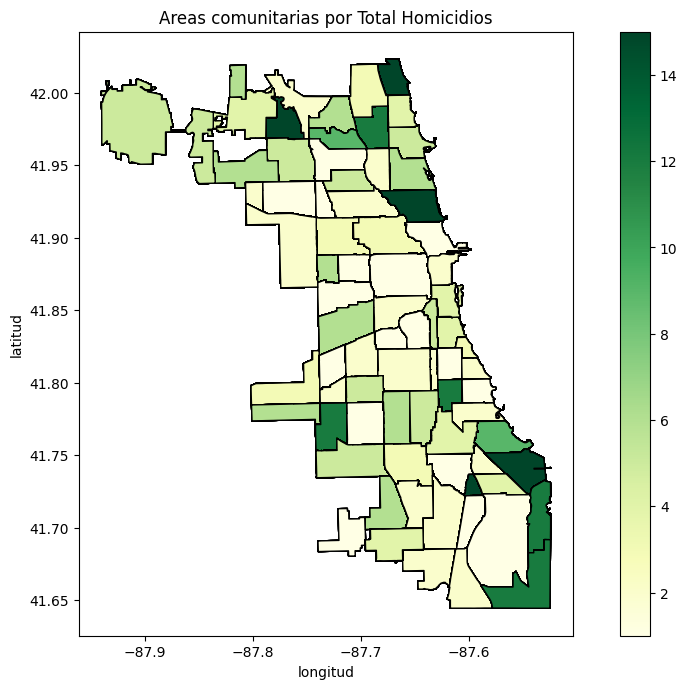

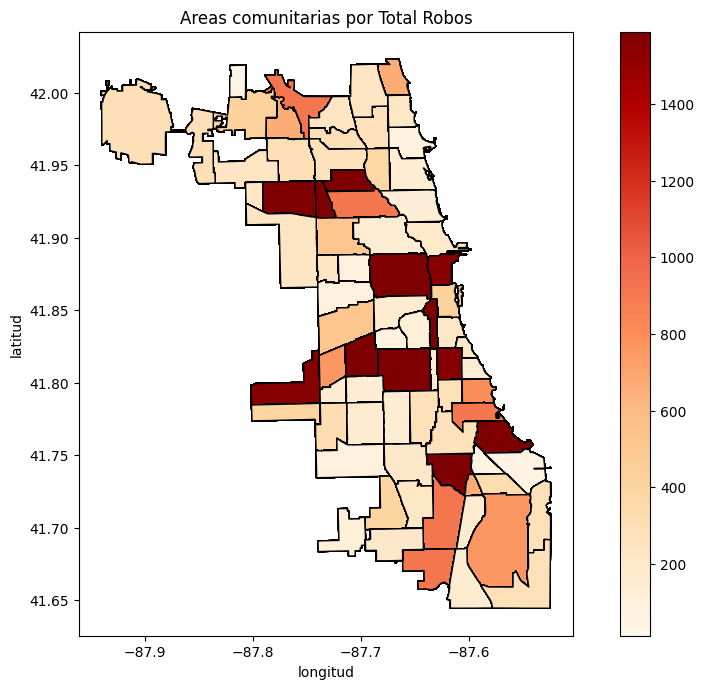

In [ ]:
# Agregacion de total delitos por area comunitaria
tipo_crimen_agregado=pd.DataFrame(delitos_df.groupby('nro_area_comunitaria').agg(total_delitos=('tipo_crimen','count'))).reset_index()
# Agregacion de robos por area comunitaria
robo_agregado=pd.DataFrame(delitos_df[delitos_df['tipo_crimen']=='robo'].groupby('nro_area_comunitaria').agg(total_robos=('tipo_crimen','count'))).reset_index()
# Agregacion de homicidios por area comunitaria
homicidio_agregado=pd.DataFrame(delitos_df[delitos_df['tipo_crimen']=='homicidio'].groupby('nro_area_comunitaria').agg(total_homicidios=('tipo_crimen','count'))).reset_index()


#Merge de los anteriores agregaciones al original dataset de delitos_df para tner esos totales 
#en un solo dataframe llamado delitos_agregados
delitos_agregado= delitos_df.merge(tipo_crimen_agregado, how='inner',
                                   left_on='nro_area_comunitaria', right_on='nro_area_comunitaria')

delitos_agregado= delitos_agregado.merge(robo_agregado, how='inner',
                                         left_on='nro_area_comunitaria', right_on='nro_area_comunitaria')

delitos_agregado= delitos_agregado.merge(homicidio_agregado, how='left',
                                         left_on='nro_area_comunitaria', right_on='nro_area_comunitaria')


# Crear geodataframe desde dataframe de delitos para obtener la geometria activa  de puntos con base en la longitu y latitude
delitos_gpd = gpd.GeoDataFrame(delitos_agregado,crs="EPSG:4326", geometry = gpd.points_from_xy(delitos_df.lon, delitos_df.lat))
delitos_gpd = delitos_gpd.set_crs("EPSG:4326")
delitos_gpd = delitos_gpd.set_crs(epsg=4326)
areas_comunitarias_gpd = areas_comunitarias_gpd.set_crs("EPSG:4326",allow_override=True)
areas_comunitarias_gpd = areas_comunitarias_gpd.set_crs(epsg=4326)

delitos_areascomun_geometria_poligonos = gpd.sjoin(areas_comunitarias_gpd,delitos_gpd)
fig, ax = plt.subplots(figsize = (12, 8), dpi = 100)
delitos_areascomun_geometria_poligonos.plot(ax = ax, column='total_delitos' ,edgecolor = 'black', legend = True, cmap='OrRd');
ax.set_xlabel('longitud')
ax.set_ylabel('latitud')
plt.title("Areas comunitarias por Total Delitos")

fig, ax = plt.subplots(figsize = (12, 8), dpi = 100)
delitos_areascomun_geometria_poligonos.plot(ax = ax, column='total_homicidios' ,edgecolor = 'black', legend = True, cmap='YlGn');
ax.set_xlabel('longitud')
ax.set_ylabel('latitud')
plt.title("Areas comunitarias por Total Homicidios")

fig, ax = plt.subplots(figsize = (12, 8), dpi = 100)
delitos_areascomun_geometria_poligonos.plot(ax = ax, column='total_robos' ,edgecolor = 'black', legend = True, cmap='OrRd');
ax.set_xlabel('longitud')
ax.set_ylabel('latitud')
plt.title("Areas comunitarias por Total Robos")



# Analisis y procedimiento

- Se hace una agregacion de  total delitos,  total de robos y total de homicidios por area comunitaria. 

- Se hace un merge de las agregaciones anteriores con el dataframe delitos y se obtiene  un final dataframe delitos_agregados. Reconozco  que hay redundancia de informacion en este nuevo dataframe, pero la idea es que cuando creemos el geodataframe y se haga la union geoespacial con areas-comunitarias, toda la informacion pertinente este ya disponible para darle la paleta de colores dado los totales de crimenes, robo y homicidios.
- Se crea el geodataframe con la geometria activa POINT con base en la latitude y longitud de las coordenadas de delitos.

- Se asegura que este nuevo  geodataframe tenga el sistema de referencia de coordenadas similar al de areas comunigtarias  EPSG:4326.

- Se hace la union geoespacial y la paleta de colores es la columna de 'total-delitos', 'total-robos' y 'total-homicidios'.

- Las areas con mas delitos son 32, 8, 28, 24 y 6 en total_delitos  y robos  respectivamente.

Tomando como centro de la ciudad las coordenadas (-87.627800, 41.881998), estime funciones de densidad que muestren gráficamente el gradiente del total de delitos, de robos, y homicidios, como función de la distancia al centro de la ciudad. Explique cómo midió las distancias incluyendo que medida de distancia utilizó. Para elegir el ancho de banda y la función de kernel más apropiados utilice validación cruzada usando todas las opciones posibles de kernel. Explique brevemente la forma que toman estas funciones de kernel y su influencia en la estimación.

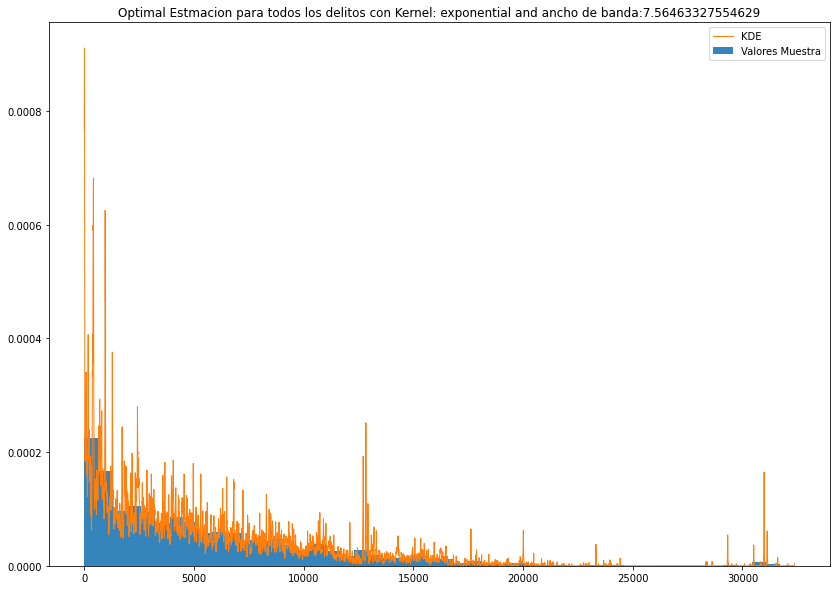

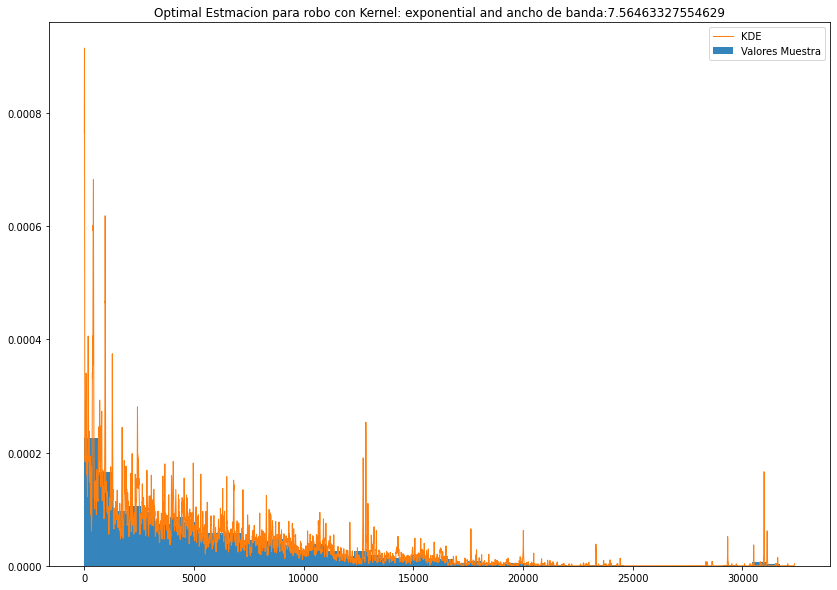

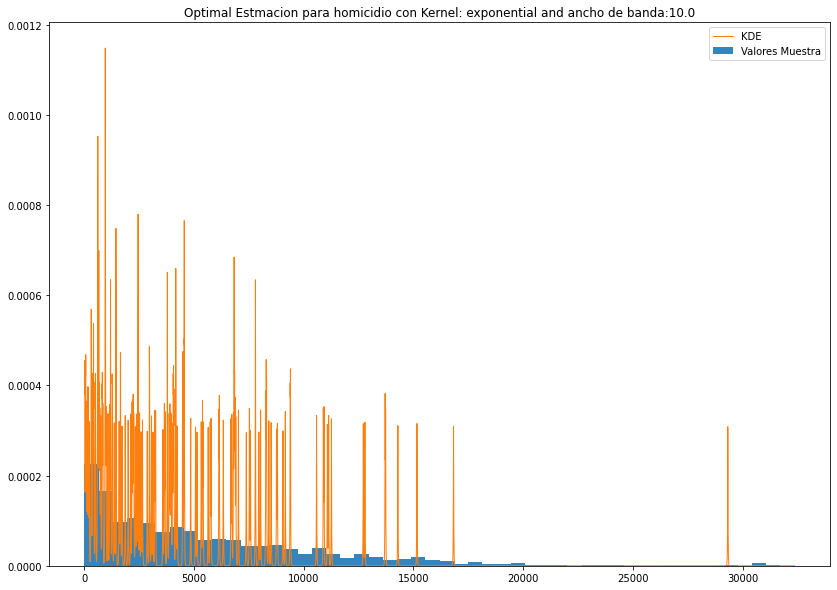

In [ ]:
from geopy.distance import geodesic
from sklearn.neighbors import KernelDensity
from sklearn.model_selection import GridSearchCV
import numpy as np

import warnings
warnings.filterwarnings('ignore')


# Funcion parta calcular la distancia geodesica (distancia mas corta espacial)
def distancia(fila):
    coord_centro=(-87.627800, 41.881998)
    coord_punto = (fila['lon'], fila['lat'])
    return geodesic(coord_centro,coord_punto).m
        

# Obtner el mejor estimador de GridSearchCV dado los explicitos anchos de banda y kernels
def kde_optimizado(x_train):
    anchos_banda = 10 ** np.linspace(-1, 1, 100)
    kernels = ['cosine', 'epanechnikov', 'exponential', 'gaussian', 'linear', 'tophat']
    grid = GridSearchCV(KernelDensity(),
                    {'bandwidth': anchos_banda, 'kernel': kernels},
                    cv=3)
    grid.fit(x_train.to_numpy()[:,  np.newaxis])
    return grid.best_estimator_

# Funcion para plotar el KDE univariado
def plot_kde (estimador, x_train, x_test, label):
    fig, ax = plt.subplots(figsize=(14, 10))
    ax.hist(x_train.to_numpy()[:,  np.newaxis], bins=50, density=True, alpha=0.9, label='Valores Muestra')
    log_density = np.exp(estimador.score_samples(x_test))
    ax.plot(x_test[:, 0], log_density, '-', linewidth=1, label='KDE')
    ax.legend(loc='upper right')
    plt.title(f'Optimal Estmacion para {label} con Kernel: {estimador.kernel} and ancho de banda:{ estimador.bandwidth}')
    plt.show()

#MAIN
delitos_agregado['distancia_a_centro']= delitos_df.apply(lambda fila: distancia(fila), axis=1)
x_vec = np.linspace(min(delitos_agregado['distancia_a_centro']), max(delitos_agregado['distancia_a_centro']), 10000)[:, np.newaxis]

#KDE DE DISTANCIAS_A-CENTRO PARA TODOS LOS DELITOS
optimo_kde=kde_optimizado(delitos_agregado['distancia_a_centro'])
plot_kde (optimo_kde, delitos_agregado['distancia_a_centro'], x_vec, 'todos los delitos') 


#KDE DE DISTANCIAS_A-CENTRO PARA ROBO
x_train = delitos_agregado[delitos_agregado['tipo_crimen']=='robo']
optimo_kde=kde_optimizado(x_train['distancia_a_centro'])
plot_kde (optimo_kde, delitos_agregado['distancia_a_centro'], x_vec, 'robo') 


#KDE DE DISTANCIAS_A-CENTRO PARA HOMICIDIOS 
x_train = delitos_agregado[delitos_agregado['tipo_crimen']=='homicidio']
optimo_kde=kde_optimizado(x_train['distancia_a_centro'])
plot_kde (optimo_kde, delitos_agregado['distancia_a_centro'], x_vec,'homicidio') 


# Analisis
- Se toma la funcion de distancia geodesica parta calcular la distancia de cada incidente de crimen  a la coordenada de referencia del centro de la ciudad.  Se apliuca la distancia geodesica porque es la distancia mas corta en superfices curvas.

- Se implementa una funcion llamada `kde_optimizado` que hace validacion cruzada, cuya grilla se compone de valores de ancho de banda y los kernels conocidos. Esta funcion devuelve el mejor estimador `KernelDensity` con sus respectivos valores optimos de parametros de ancho de banda y kernel.
- Los kernes a seleccionar son  ['cosine', 'epanechnikov', 'exponential', 'gaussian', 'linear', 'tophat']

- Dado que el dataset se compone principalmente de crimenes de robo, yo ; espero que el KDE de total de delitos  y total de robos tenga los mismos parametros.

- Los resultados de la validacion cruzada son:


|       | Kernel | Ancho de banda
| ----------- | ----------- |----------- |
| Total delitos      | exponencial       | 7.56467|
| Total robos   | exponencial        |7.56467|
| Total homicidios   | exponencial        |10|

Efectivamente, total_delitos y total_homicidios tienen los mismos parametros.

### 3. Análisis de puntos calientes 

#### 3.1 Visualización preliminar

Utilizando la librería `seaborn` genere un  gráfico de dispersión de longitud y latitud, junto a los histogramas univariados en los márgenes. Haga esta gráfica para:

1. El total de delitos.
2. El total de robos. 
3. El total de homicidios.

En su análisis y conclusiones compare estos resultados con los obtendinos al agregar al nivel de áreas.

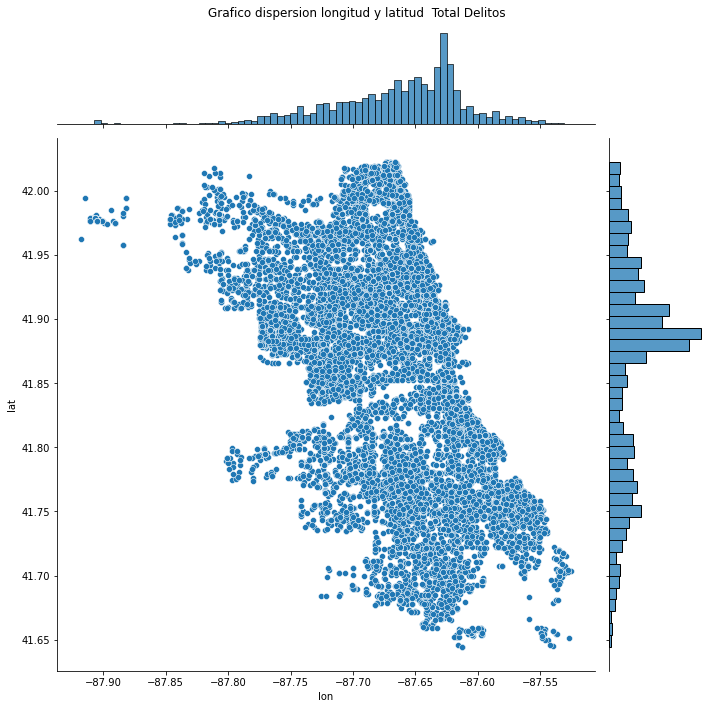

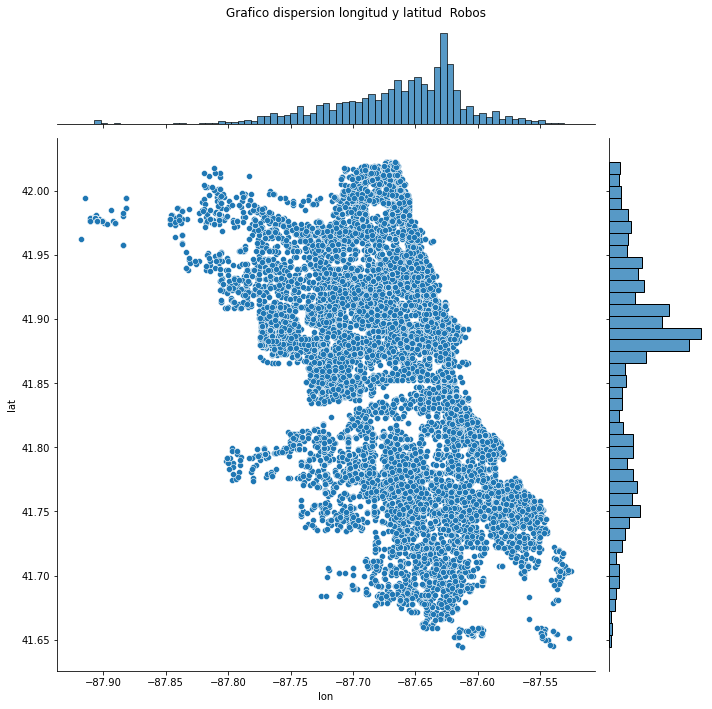

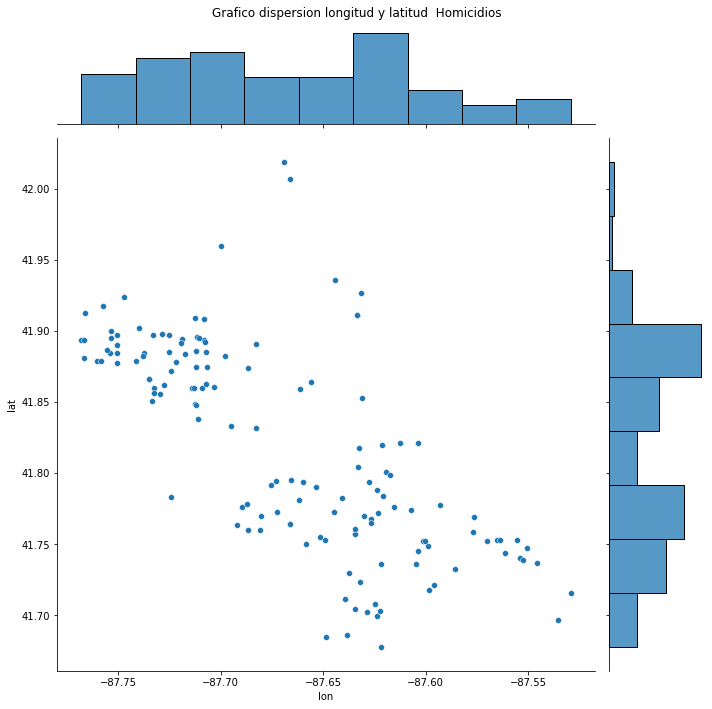

In [ ]:
def titulo_joinplot(titulo, plot):
  plot.fig.suptitle(titulo)
  plot.fig.tight_layout()
  plot.fig.subplots_adjust(top=0.95) 

# MAIN
plot=sns.jointplot(data = delitos_df, x = "lon", y = "lat", height=10)
titulo_joinplot("Grafico dispersion longitud y latitud  Total Delitos",plot)

plot=sns.jointplot(data = delitos_df[delitos_df['tipo_crimen']=='robo'], x = "lon", y = "lat" ,height=10 )
titulo_joinplot("Grafico dispersion longitud y latitud  Robos",plot)

plot=sns.jointplot(data = delitos_df[delitos_df['tipo_crimen']=='homicidio'], x = "lon", y = "lat" ,height=10)
titulo_joinplot("Grafico dispersion longitud y latitud  Homicidios",plot)


# Analisis

- Respecto al total delitos , se observa concentracion de puntos que correponden a las areas comunitarias visualzadas en los mapas.

- Se puede observar en los histogramas univariados de hocimidios, una caracteristca bimodal.

#### 3.2 KDE preliminar

Transforme las gráficas anteriores a una gráfica que muestre la densidad bivariada estimada:

1. El total de delitos.
2. El total de robos. 
3. El total de homicidios.

En su análisis y conclusiones incluya la discusión de cuáles son las ventajas y limitaciones de usar `seaborn` para este tipo de estimación y análisis.

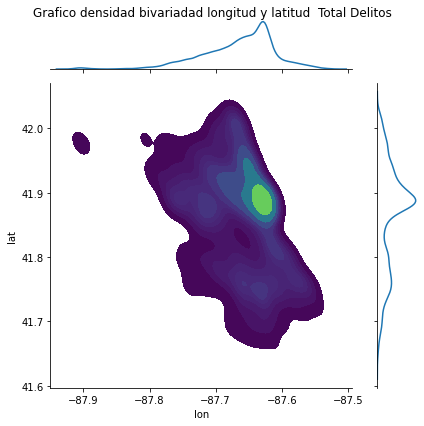

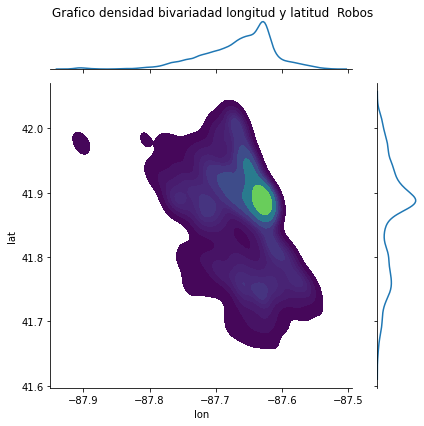

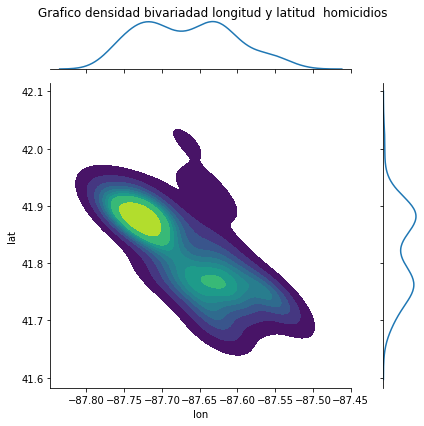

In [ ]:
# MAIN
plot=sns.jointplot(data = delitos_df, x = "lon", y = "lat",kind="kde", shade = True, cmap = 'viridis')
titulo_joinplot("Grafico densidad bivariadad longitud y latitud  Total Delitos",plot)

plot= sns.jointplot(data = delitos_df[delitos_df['tipo_crimen']=='robo'], x = "lon", y = "lat" ,kind="kde", shade = True, cmap = 'viridis' )
titulo_joinplot("Grafico densidad bivariadad longitud y latitud  Robos",plot)

plot=sns.jointplot(data = delitos_df[delitos_df['tipo_crimen']=='homicidio'], x = "lon", y = "lat" ,kind="kde", shade = True, cmap = 'viridis' )
titulo_joinplot("Grafico densidad bivariadad longitud y latitud  homicidios",plot)


# Analisis

- Recordar que la densidad de `searborn.joinplot` viene dada por el kernel gaussiano y con el ancho de banda:Regla de Scott: $h \approx 1.06⋅\hat{\sigma} n^{−1/5}$.

- Hay un punto caliente en total_delitos y robos que corresponde aproximadamente a la media de las distribuciones univaridas tanto de longitud como latitude.

- Por otro lado, por el lado de homicidios hay dos puntos calientes que corresponden aproximadamente a los modos de  las distribuciones bimodales univariadas. 



### 3.3 KDE

Usando `statsmodels` implemente la estimación de densidad bivariada para:

1. El total de delitos. 
2. El total de robos. 
3. El total de homicidios.

Muestre los resultados usando curvas de nivel en una visualización interactiva. Compare los resultados de estimar usando los anchos de banda: `normal_reference` y `cv_ml`. Explique en que consisten ambas formas de estimar el ancho de banda.

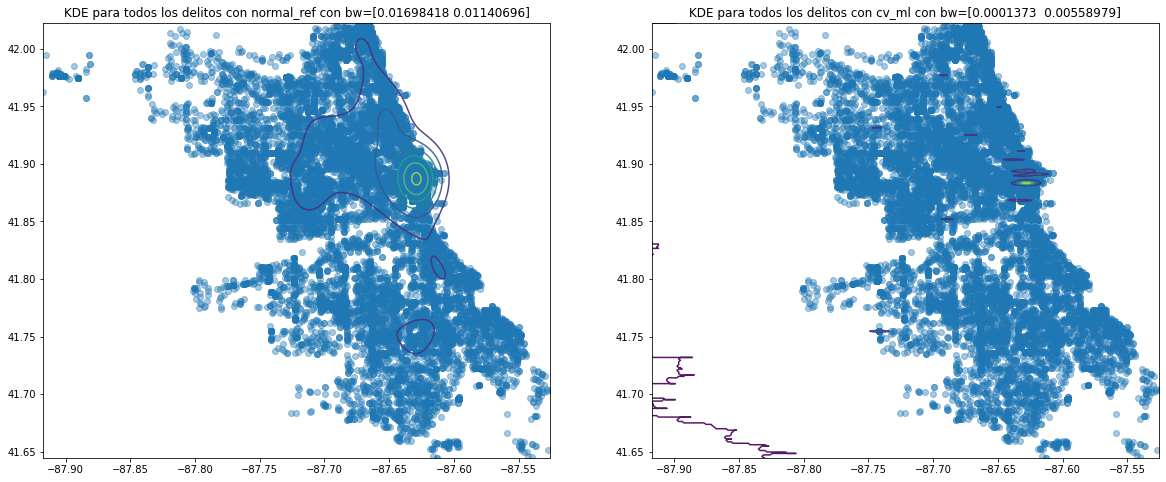

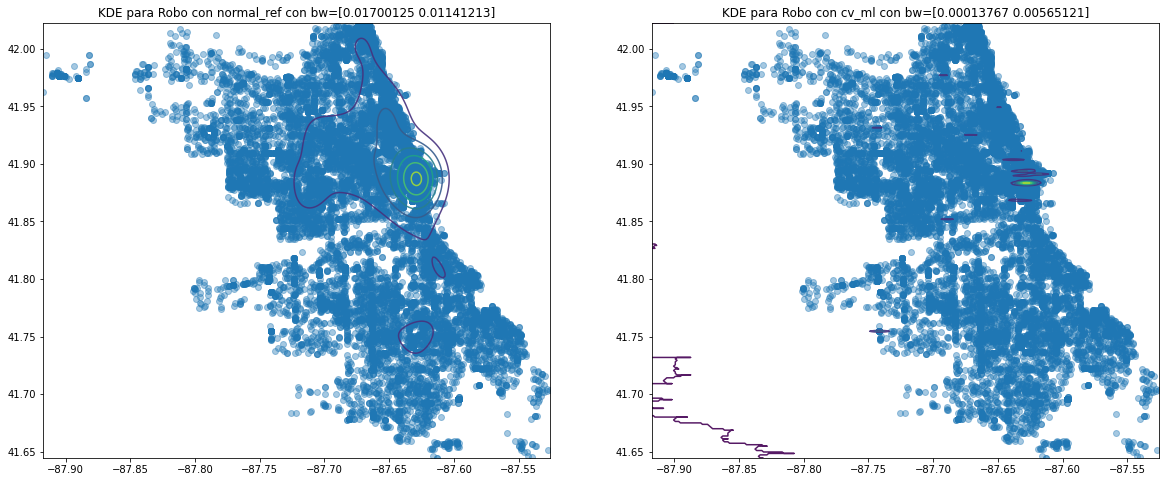

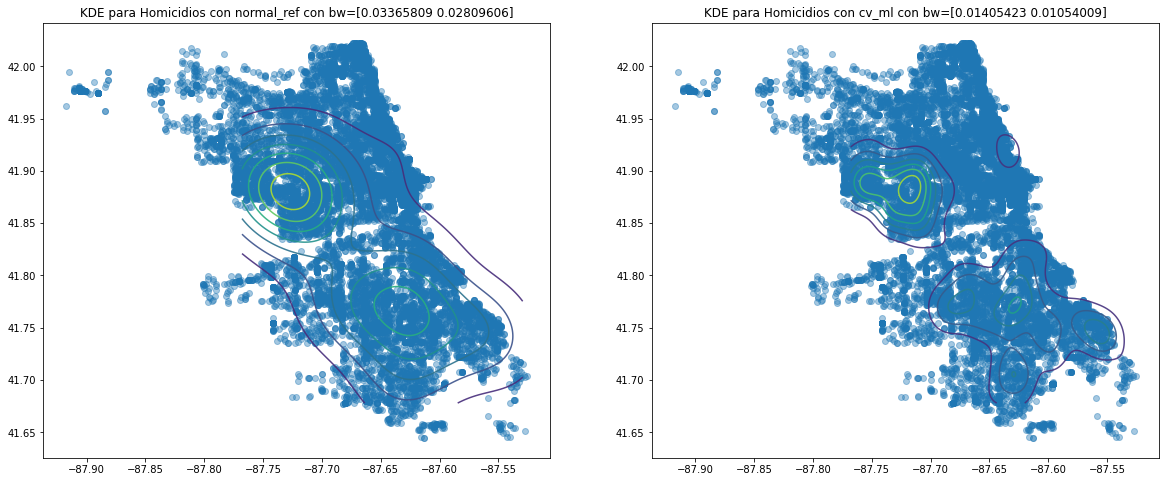

In [ ]:
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')

def kde_multivariada(x_train, anchos_banda='normal_reference'):
  dens_u = sm.nonparametric.KDEMultivariate(data=x_train[['lat','lon']], var_type='cc', bw=anchos_banda)
  # Grilla de valores dentro del rango observado (2 dimensiones)
  x = np.linspace(min(x_train['lon']), max(x_train['lon']), 300)
  y = np.linspace(min(x_train['lat']), max(x_train['lat']), 300)
  xx, yy = np.meshgrid(x, y)
  grid = np.column_stack(( yy.flatten(),xx.flatten()))
  densidad_pred=dens_u.pdf(data_predict=grid)
  return (xx, yy, densidad_pred, dens_u)

def plot_contorno_kde(estimador, xx, yy,densidad_pred, subplot,label ):
  subplot.scatter(delitos_df.lon, delitos_df.lat, alpha=0.4)
  subplot.contour(xx, yy, densidad_pred.reshape(xx.shape),  alpha =0.9)
  subplot.set_title(f'KDE para {label} con bw={estimador.bw}')


# KDE Multivariada total delitos con ancho de banda= normal reference

fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2, figsize=(20, 8))
(xx,yy, densidad_pred, estimador) = kde_multivariada(delitos_df)
plot_contorno_kde (estimador,xx, yy, densidad_pred, ax1,'todos los delitos con normal_ref')

# KDE Multivariada con ancho de banda= cv_ml
(xx,yy, densidad_pred, estimador,) = kde_multivariada(delitos_df,anchos_banda='cv_ml')
plot_contorno_kde (estimador,xx, yy, densidad_pred, ax2,'todos los delitos con cv_ml')
plt.show()
# KDE Multivariada con ancho de banda= normal reference

fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2, figsize=(20, 8))
(xx,yy, densidad_pred, estimador) = kde_multivariada(delitos_df[delitos_df['tipo_crimen']=='robo'])
plot_contorno_kde (estimador,xx, yy, densidad_pred, ax1,'Robo con normal_ref')

# KDE Multivariada con ancho de banda= cv_ml
(xx,yy, densidad_pred, estimador,) = kde_multivariada(delitos_df[delitos_df['tipo_crimen']=='robo'],anchos_banda='cv_ml')
plot_contorno_kde (estimador,xx, yy, densidad_pred, ax2,'Robo con cv_ml')
plt.show()


# KDE Multivariada con ancho de banda= normal reference

fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2, figsize=(20, 8))
(xx,yy, densidad_pred, estimador) = kde_multivariada(delitos_df[delitos_df['tipo_crimen']=='homicidio'])
plot_contorno_kde (estimador,xx, yy, densidad_pred, ax1,'Homicidios con normal_ref')

# KDE Multivariada con ancho de banda= cv_ml
(xx,yy, densidad_pred, estimador,) = kde_multivariada(delitos_df[delitos_df['tipo_crimen']=='homicidio'],anchos_banda='cv_ml')
plot_contorno_kde (estimador,xx, yy, densidad_pred, ax2,'Homicidios con cv_ml')

plt.show()


# Analisis

- Por curiosidad , hice el ejericio usando sin y con mapas interactivos para poder comparar los KDE sin mapas interactivos con los resultados con la visualizacion de puntos calientes con `seaborn.joinplot`.
- Se uso validacion cruzada para determinar los anchos de banda:

| ancho banda      | Descripcion |
| ----------- | ----------- |
| normal_reference      | ancho de banda es la regla empirica de referencia normal de Scott       |
| cv_ml   | parámetro de ancho de banda de máxima probabilidad de validación cruzada.  Devuelve la estimación del ancho de banda que maximiza verosimilitud leave-out-out |


- Con 'normal_reference' como ancho de banda , el KDE y los puntos calientes corresponden con los diagramas de seaborn.jointplot. Por que? Por que ambos usan la regla empirica de Scott y el kernes es Gaussiano.

- Con -'cv-ml' como ancho de banda, el KDE y los puntos calientes se revelan de un manera mas precisa y quirurjica dado que maximizan la verosimilitud usando leave_out-out. Tambien esta es la razon que la validacion cruzada toma tanto tiempo.

### Seleccion entre 'normal_ref' y 'cv_ml'

Dependiendo del tipo de problema se aplica uno o el otro. 'Nornal_reference' nos da una una aproximacion y panoramica general de zonas calientes. Pero en este caso particular, si necesitamos cubrir la zonas calientes con apoyo policiaco; 'normal_reference' suministran zonas mucho mas amplias. En cambio, con cv_ml podemos dar unas zonas mucho mas granulares en el cual se puedan concentrar  los cuadrantes de seguridad.



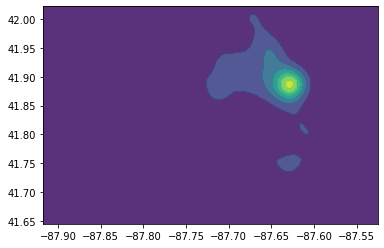

In [ ]:
import geojsoncontour
import folium
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')

def kde_multivariada(x_train, anchos_banda='normal_reference'):
    dens_u = sm.nonparametric.KDEMultivariate(data=x_train[['lat','lon']], var_type='cc', bw=anchos_banda)
    # Grilla de valores dentro del rango observado (2 dimensiones)
    x = np.linspace(min(x_train['lon']), max(x_train['lon']), 300)
    y = np.linspace(min(x_train['lat']), max(x_train['lat']), 300)
    xx, yy = np.meshgrid(x, y)
    grid = np.column_stack(( yy.flatten(),xx.flatten()))
    densidad_pred=dens_u.pdf(data_predict=grid)
    return (xx, yy, densidad_pred, dens_u)

def map_curvas_de_nivel(estimador, xx, yy,densidad_pred, label ):
    contourf = plt.contourf(xx, yy, densidad_pred.reshape(xx.shape),  alpha =0.9, linestyles='None')
    geojson = geojsoncontour.contourf_to_geojson(
            contourf=contourf,
            min_angle_deg=3.0,
            ndigits=5,
            stroke_width=1,
            fill_opacity=0.1)
    
    texto_titulo = f'Curvas de Nivel para {label} con bw={estimador.bw} '
    titulo_mapa = '''
             <h3 align="center" style="font-size:16px"><b>{}</b></h3>
             '''.format(texto_titulo)   
    mapa = folium.Map([yy.mean(), xx.mean()], zoom_start=10, tiles="OpenStreetMap")
    # Plotla curva de nivel en mapa de follium m
    folium.GeoJson(
        geojson,
        style_function=lambda x: {
            'color':     x['properties']['stroke'],
            'weight':    x['properties']['stroke-width'],
            'fillColor': x['properties']['fill'],
            'opacity':   0.8,
        }).add_to(mapa)
    mapa.get_root().html.add_child(folium.Element(titulo_mapa))
    return mapa



# Curvas de nivel para todos los delitos con normal-reference como ancho de banda
(xx,yy, densidad_pred, estimador) = kde_multivariada(delitos_df)
mapa=map_curvas_de_nivel(estimador,xx,yy,densidad_pred,'todos los delitos con normal_reference')
mapa







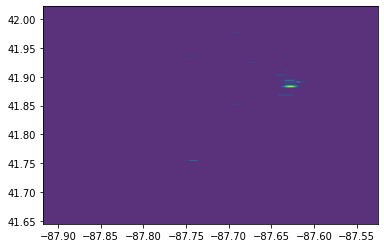

In [ ]:


# Curvas de nivel para todos los delitos con 'cv-ml' como ancho de banda
(xx,yy, densidad_pred, estimador) = kde_multivariada(delitos_df, anchos_banda='cv_ml')
mapa=map_curvas_de_nivel(estimador,xx,yy,densidad_pred,'todos los delitos con cv_ml')
mapa


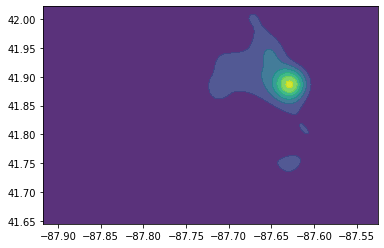

In [ ]:
# Curvas de nivel para robos con 'normal-reference' como ancho de banda
(xx,yy, densidad_pred, estimador) = kde_multivariada(delitos_df[delitos_df['tipo_crimen']=='robo'])
mapa=map_curvas_de_nivel(estimador,xx,yy,densidad_pred,'robo con normal_reference')
mapa

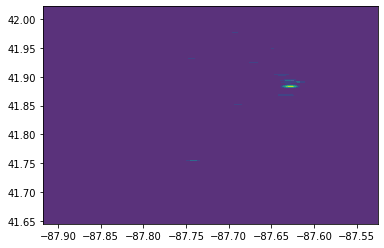

In [ ]:
# Curvas de nivel para robos con 'cv-ml' como ancho de banda
(xx,yy, densidad_pred, estimador) = kde_multivariada(delitos_df[delitos_df['tipo_crimen']=='robo'],anchos_banda='cv_ml')
mapa=map_curvas_de_nivel(estimador,xx,yy,densidad_pred,'robo con cv-ml')
mapa

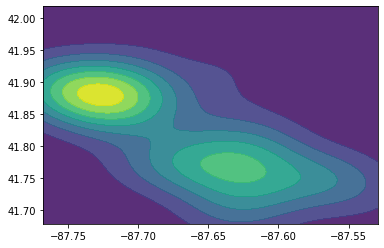

In [ ]:
# Curvas de nivel para todos homicidios con 'normal-reference' como ancho de banda
(xx,yy, densidad_pred, estimador) = kde_multivariada(delitos_df[delitos_df['tipo_crimen']=='homicidio'])
mapa=map_curvas_de_nivel(estimador,xx,yy,densidad_pred,'homicidio con normal_ref')
mapa

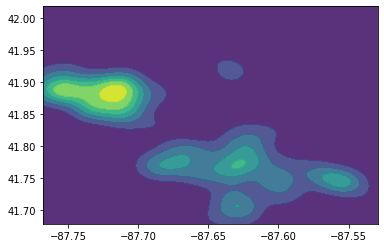

In [ ]:
# Curvas de nivel para homicidios con 'cv-ml' como ancho de banda
(xx,yy, densidad_pred, estimador) = kde_multivariada(delitos_df[delitos_df['tipo_crimen']=='homicidio'],anchos_banda='cv_ml')
mapa=map_curvas_de_nivel(estimador,xx,yy,densidad_pred,'homicidio con cv-ml')
mapa

# Analisis

- En esta seccion se usa el caluclo de los KDE y puntos calientes con con mapas interactivos

- Se uso validacion cruzada para determinar los anchos de banda:

| ancho banda      | Descripcion |
| ----------- | ----------- |
| normal_reference      | ancho de banda es la regla empirica de referencia normal de Scott       |
| cv_ml   | parámetro de ancho de banda de máxima probabilidad de validación cruzada.  Devuelve la estimación del ancho de banda que maximiza verosimilitud leave-out-out |


- Con 'normal_reference' como ancho de banda , el KDE y los puntos calientes corresponden con los diagramas de `seaborn.jointplot`. Por que? Por que ambos usan la regla empirica de Scott y el kernes es Gaussiano.

- Con -'cv-ml' como ancho de banda, el KDE y los puntos calientes se revelan de un manera mas precisa y quirurjica dado que maximizan la verosimilitud usando leave_out-out. Tambien esta es la razon que la validacion cruzada toma tanto tiempo.


### Seleccion entre 'normal_ref' y 'cv_ml'

Dependiendo del tipo de problema se aplica uno o el otro. 'Nornal_reference' nos da una una aproximacion y panoramica general de zonas calientes. Pero en este caso particular, si necesitamos cubrir la zonas calientes con apoyo policiaco; 'normal_reference' suministran zonas mucho mas amplias. En cambio, con cv_ml podemos dar unas zonas mucho mas granulares en el cual se puedan concentrar  los cuadrantes de seguridad.

## 4. Explicando la ubicación del delito

La idea de este punto es, de ser posible, encontrar posibles correlaciones  entre el crimen y características de la ciudad. Para ello, baje los datos de OpenStreetMap y explore si existen correlaciones con características de la ciudad. Usted es libre de bajar y explorar distintas características de la ciudad, pero como mínimo espero que sea capaz de ver la correlación entre el uso de tierra en tiendas (`retail`)  y uso comercial (`commercial`). Ofrezca una explicación intuitiva de por qué cree que aparecen estas correlaciones.

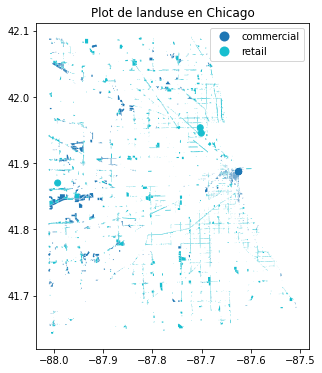

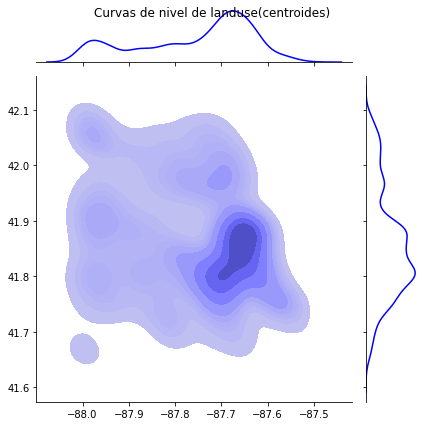

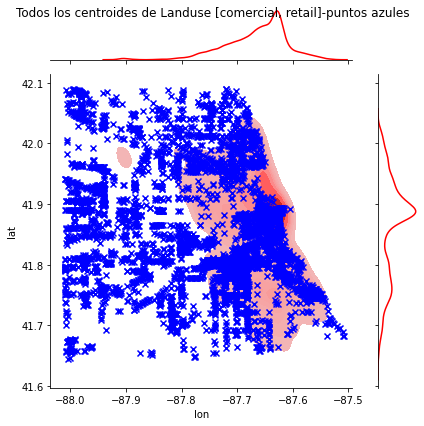

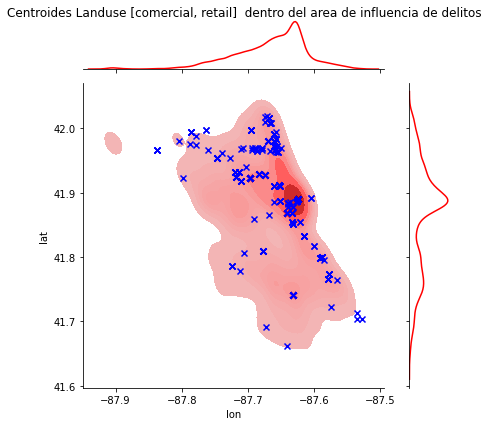

In [ ]:
from pyrosm import OSM
from pyrosm import get_data

import warnings
warnings.filterwarnings('ignore')

# Leer la geometria geoespacial y salvar este archivo localmente para el uso en otras ocasiones.
fp = get_data("Chicago", directory='data'),
osm = OSM('data/Chicago.osm.pbf')
landuse_gpd = osm.get_landuse({'landuse': ['commercial', 'retail']})
landuse_gpd.plot(column='landuse', legend=True, figsize=(10,6))
plt.title("Plot de landuse en Chicago")
plt.show()

#Configurar el systema de referencia de coordenadas
landuse_gpd = landuse_gpd.set_crs("EPSG:4326",allow_override=True)
landuse_gpd = landuse_gpd.set_crs(epsg=4326)

# Caluclar los centroides de las geometrias poligonales
landuse_gpd['centroide']=landuse_gpd['geometry'].to_crs(epsg=4326).centroid
landuse_gpd['centroide']

# plot curvas de nivel e landuse (centroides)
graph=sns.jointplot(x =landuse_gpd['centroide'].x, y = landuse_gpd['centroide'].y,kind="kde", shade = True,color='blue')
graph.fig.suptitle("Curvas de nivel de landuse(centroides)")
graph.fig.tight_layout()
plt.show()

# plot centroidess de la zonas de retail y comercial con la KDE de delitos
# ========================================   
graph = sns.jointplot(data = delitos_df, x = "lon", y = "lat",kind="kde", shade = True,color='r')
graph.x = landuse_gpd['centroide'].x
graph.y = landuse_gpd['centroide'].y
graph.plot_joint(plt.scatter, marker='x', c='b', label='centroides landuse')
graph.fig.suptitle("Todos los centroides de Landuse [comercial, retail]-puntos azules")
graph.fig.tight_layout()
plt.show()


# plot centroidess de la zonas de retail y comercial con JOIN de delitos
# ========================================   
landuse_delitos_centroides_gpd = gpd.sjoin(delitos_gpd,landuse_gpd)
graph = sns.jointplot(data = delitos_df, x = "lon", y = "lat",kind="kde", shade = True,color='r')
graph.x = landuse_delitos_centroides_gpd['centroide'].x
graph.y = landuse_delitos_centroides_gpd['centroide'].y
graph.plot_joint(plt.scatter, marker='x', c='b')
graph.fig.suptitle("Centroides Landuse [comercial, retail]  dentro del area de influencia de delitos")
graph.fig.tight_layout()
graph.fig.subplots_adjust(top=0.95) 
plt.show()



In [ ]:

import statsmodels.api as sm
def kde_multivariada(x_train, anchos_banda='normal_reference'):
  dens_u = sm.nonparametric.KDEMultivariate(data=x_train[['lat','lon']], var_type='cc', bw=anchos_banda)
  # Grilla de valores dentro del rango observado (2 dimensiones)
  x = np.linspace(min(x_train['lon']), max(x_train['lon']), 300)
  y = np.linspace(min(x_train['lat']), max(x_train['lat']), 300)
  xx, yy = np.meshgrid(x, y)
  grid = np.column_stack(( yy.flatten(),xx.flatten()))
  densidad_pred=dens_u.pdf(data_predict=grid)
  return (xx, yy, densidad_pred, dens_u)

(xx,yy, densidad_pred_delitos, estimador) = kde_multivariada(delitos_df)
densidad_pred_delitos=densidad_pred_delitos[:, np.newaxis]

landuse_copia= landuse_gpd.copy()
landuse_copia['lon'] = landuse_copia['centroide'].x
landuse_copia['lat'] = landuse_copia['centroide'].y
(xx,yy, densidad_pred_landuse, estimador) = kde_multivariada(landuse_copia)
densidad_pred_landuse= densidad_pred_landuse[:, np.newaxis]

df=pd.DataFrame(np.column_stack((densidad_pred_delitos, densidad_pred_landuse)), columns=['kde delitos','kde_landuse'])
df.corr('spearman')

,kde delitos,kde_landuse
kde delitos,1.000000,0.544947
kde_landuse,0.544947,1.000000


# Analisis

- Leer la geometria geoespacial  empleando el metodo `get_launduse()` y pasando los parametros  retail y comercial. Este archivo se salva localmente para poderlo trabajar offline si es el caso.

- Se configura el ssstema de referencia de coordenadas a EPSG:4326

- Se hace un plot de los poligonos que forman estas diferentes areas en Chicago.

- Como la geometria activa de landuse son poligonos, se obtiene los centroides de esas areas poligonales con el fin de visualizar las distribuciones univariadas de latitud y longitud  empleando `seaborn.jointplot`, y visualizando  la distribcion multivariada tambien.

- Empleando la distribucion multivariada de delitos, se sobreponen a esa visualizacion el  plot de puntos de centroides de landuse, para visualizar posibles relaciones y aqui  se empieza a percibir algun tipo de relacion.

- Se hace una union geoespacial entre la geometria de centroides y geometria de delitos y se muestra esta union especial en un diagrama de `seaborn.joinplot` para mirar la relacion espacial de esa union, y de alguna manera empieza a percibirse algun tipo de relacion.

- Dado que se tienen puntos geoespaciales (latitud/long)de los delitos y puntos geoespaciales de los centroides de landuse (lat/log) , se calcula KDE multivariado para delitos y landuse;  y finalmente se calcula la correlacion spearman que nos permite encontrar el grado de asociacion "no lineal' mononotica entre las dos KDEs.


|       | kde delitos |kde landuse |
| ----------- | ----------- |---------- |
| kde delitos       | 1       |0.544947       |
| kde landuse   | 0.544947        |1        |


Se puede observa una moderada asociacion de 0.5449 entre las dos KDEs